In [1]:
#import numpy
import numpy as np
import pandas as pd

In [2]:
#mendefinisikan data x, sebagai contoh kita akan gunakan matriks ukuran 2 
x = np.matrix([[-20,23,5],[4,-8,15]])
x

matrix([[-20,  23,   5],
        [  4,  -8,  15]])

In [3]:
#centering data (data asli dikurangi nilai reratanya)
a = x.mean()
x_centering = x - a
print("x_centering: ", x_centering, "\n")

x_centering:  [[-23.16666667  19.83333333   1.83333333]
 [  0.83333333 -11.16666667  11.83333333]] 



In [4]:
#standarisasi data
b = b = x.std()
x_standarisasi = (x-a) / b
print("x_standarisasi: ", x_standarisasi)
print("mean x_standarisasi: ", x_standarisasi.mean())
print("varian x_standarisasi: ", x_standarisasi.var(), "\n")

x_standarisasi:  [[-1.6389276   1.40311068  0.12969931]
 [ 0.05895423 -0.78998669  0.83715007]]
mean x_standarisasi:  -1.850371707708594e-17
varian x_standarisasi:  1.0000000000000002 



In [5]:
#Transformasi dengan cara scaling ke range 0-1
#Tentukan nilai BB dan BA
BA = 1; BB = 0 #BA=batas atas, BB = batas bawah
x_scaling = (x - x.min()) / (x.max()-x.min()) * (BA-BB) + BB
print("x_scaling: ", x_scaling)

x_scaling:  [[0.         1.         0.58139535]
 [0.55813953 0.27906977 0.81395349]]


In [8]:
pwd

'C:\\Users\\USER\\Documents\\data mining'

In [9]:
#Transformasi logaritma natural
#Python tidak memiliki fungsi "ln", sebagai alternatif gunakan fungsi "log
#import math
import numpy as np
x_log = np.log(x)

<ipython-input-9-74ca0e2e5ef9>:5: RuntimeWarning: invalid value encountered in log
  x_log = np.log(x)


In [7]:
x = np.matrix([[-20,23,5],[4,-8,15]])
x
data1 = pd.DataFrame(x)
data1.columns = ['col_1','col_2','col_3']
data1['col_4'] = np.log(data1['col_3'])
data1

,col_1,col_2,col_3,col_4
0,-20,23,5,1.609438
1,4,-8,15,2.708050


In [10]:
# Importing
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
bos_hou = load_boston()
# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

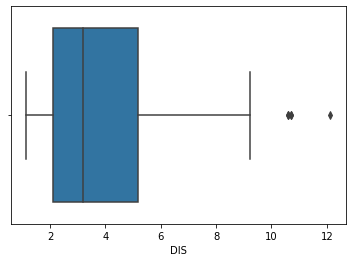

In [11]:
#deteksi outlier melalui boxplot
import seaborn as sns
sns.boxplot(df_boston['DIS'])

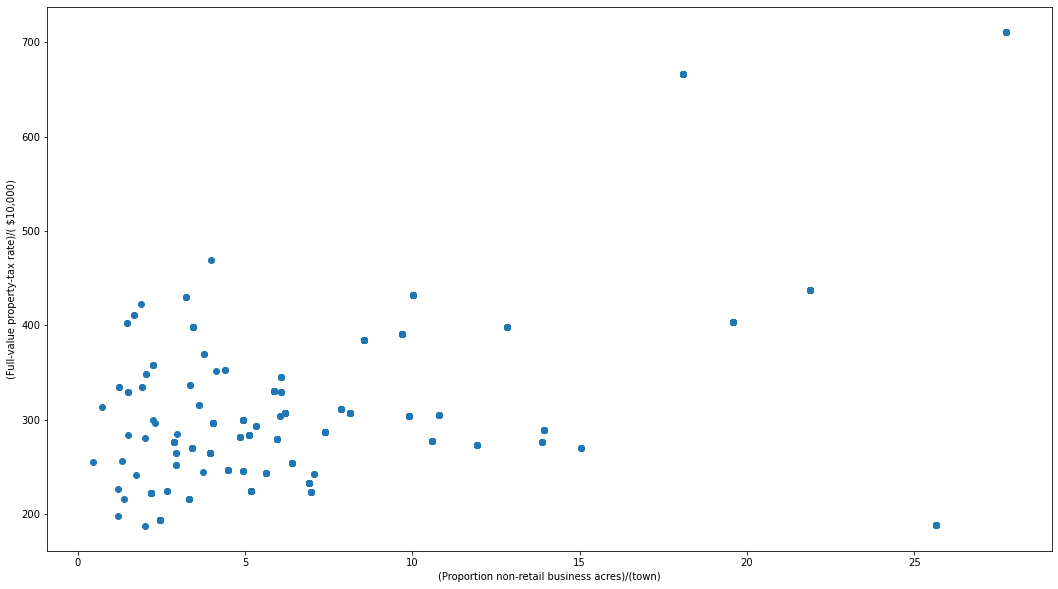

In [12]:
# deteksi outlier melalui Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_boston['INDUS'], df_boston['TAX'])
# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

In [13]:
#deteksi nilai outlier
print(np.where((df_boston['INDUS']>20) & (df_boston['TAX']>600)))

(array([488, 489, 490, 491, 492], dtype=int64),)


In [14]:
#deteksi outlier melalui szcore
# Z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_boston['DIS']))
print(z)
# Position of the outlier
print(np.where(z > 3))

[1.40213603e-01 5.57159875e-01 5.57159875e-01 1.07773662e+00
 1.07773662e+00 1.07773662e+00 8.39243922e-01 1.02463789e+00
 1.08719646e+00 1.32963473e+00 1.21297914e+00 1.15593484e+00
 7.87143464e-01 4.33754047e-01 3.17003386e-01 3.34449434e-01
 3.34449434e-01 2.20028082e-01 6.92761271e-04 6.92761271e-04
 1.35827806e-03 1.03277421e-01 8.64493539e-02 1.42685523e-01
 2.87387889e-01 3.13533191e-01 4.21632134e-01 3.12962749e-01
 3.13580728e-01 2.11043605e-01 2.08191390e-01 1.80619980e-01
 9.26766896e-02 3.72817172e-03 1.67532861e-02 2.06663257e-01
 1.98296760e-01 6.61510917e-02 2.48415135e-02 7.63470081e-01
 7.63470081e-01 9.15493132e-01 9.15493132e-01 9.15493132e-01
 9.15493132e-01 6.20526581e-01 6.20526581e-01 9.00519004e-01
 9.86370670e-01 1.08985853e+00 1.43545190e+00 1.43545190e+00
 1.43545190e+00 1.43545190e+00 1.67551331e+00 2.33004908e+00
 2.56345533e+00 2.15330683e+00 1.91086857e+00 1.49121270e+00
 1.63068600e+00 1.43725830e+00 1.63073354e+00 1.98982739e+00
 2.58023586e+00 1.338856

In [15]:
#deteksi outlier melalui IQR value
# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
 interpolation = 'midpoint')
Q3 = np.percentile(df_boston['DIS'], 75,
 interpolation = 'midpoint')
IQR = Q3 - Q1
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df_boston['DIS']>=upper)
print("Upper Bound: ",upper," \n")
print(upper_array)
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df_boston['DIS']<=lower)
print("Lower Bound: ",lower," \n")
print(lower_array)

Upper Bound:  9.76185  

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False F

In [56]:
# Importing
import sklearn
from sklearn.datasets import load_boston
import pandas as pd

# Load the dataset
bos_hou = load_boston()

# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()
''' Detection '''

# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
     interpolation = 'midpoint')
Q3 = np.percentile(df_boston['DIS'], 75,
     interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df_boston.shape)

# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df_boston['DIS']>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df_boston['DIS']<=lower)

#boston_df_out = df_boston[~((df_boston < (Q1 - 1.5 * IQR))|(df_boston > (
#boston_df_out.shape
#boston_df_out
# Removing the outliers
df_boston.drop(upper_array = True)

#df_boston.drop(lower_array[0], inplace = True)
#print("New Shape: ", df_boston.shape)
df_boston
lower_array
upper_array

Old Shape:  (506, 13)


TypeError: drop() got an unexpected keyword argument 'upper_array'

In [26]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [31]:
means = np.mean(df, axis=0)
means

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [34]:
centered_df = df - means
centered_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.154948,27.105469,2.894531,14.463542,-79.799479,1.607422,0.155124,16.759115,0.651042
1,-2.845052,-35.894531,-3.105469,8.463542,-79.799479,-5.392578,-0.120876,-2.240885,-0.348958
2,4.154948,62.105469,-5.105469,-20.536458,-79.799479,-8.692578,0.200124,-1.240885,0.651042
3,-2.845052,-31.894531,-3.105469,2.463542,14.200521,-3.892578,-0.304876,-12.240885,-0.348958
4,-3.845052,16.105469,-29.105469,14.463542,88.200521,11.107422,1.816124,-0.240885,0.651042
...,...,...,...,...,...,...,...,...,...
763,6.154948,-19.894531,6.894531,27.463542,100.200521,0.907422,-0.300876,29.759115,-0.348958
764,-1.845052,1.105469,0.894531,6.463542,-79.799479,4.807422,-0.131876,-6.240885,-0.348958
765,1.154948,0.105469,2.894531,2.463542,32.200521,-5.792578,-0.226876,-3.240885,-0.348958
766,-2.845052,5.105469,-9.105469,-20.536458,-79.799479,-1.892578,-0.122876,13.759115,0.651042


In [38]:
stds = df.std()
stds

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [39]:
df_standardized = (df - means) / stds
df_standardized

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1.365006
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,-0.731643
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1.365006
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,-0.731643
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1.365006
...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487,-0.731643
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677,-0.731643
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580,-0.731643
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970,1.365006


In [41]:
mins = df.min()
mins

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [42]:
maxs = df.max()
maxs

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [44]:
df_scaled = (df - mins) / (maxs - mins)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [45]:
df_log = df.apply(lambda x: np.log(x))
df_log

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.791759,4.997212,4.276666,3.555348,-inf,3.514526,-0.466809,3.912023,0.0
1,0.000000,4.442651,4.189655,3.367296,-inf,3.280911,-1.046969,3.433987,-inf
2,2.079442,5.209486,4.158883,-inf,-inf,3.148453,-0.397497,3.465736,0.0
3,0.000000,4.488636,4.189655,3.135494,4.543295,3.335770,-1.789761,3.044522,-inf
4,-inf,4.919981,3.688879,3.555348,5.123964,3.763523,0.827678,3.496508,0.0
...,...,...,...,...,...,...,...,...,...
763,2.302585,4.615121,4.330733,3.871201,5.192957,3.493473,-1.766092,4.143135,-inf
764,0.693147,4.804021,4.248495,3.295837,-inf,3.605498,-1.078810,3.295837,-inf
765,1.609438,4.795791,4.276666,3.135494,4.718499,3.265759,-1.406497,3.401197,-inf
766,0.000000,4.836282,4.094345,-inf,-inf,3.404525,-1.052683,3.850148,0.0


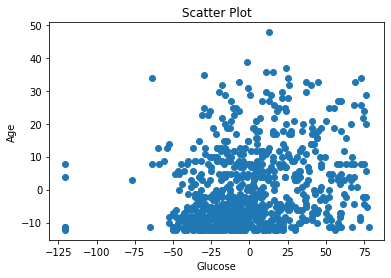

In [51]:
# deteksi outlier melalui Scatter plot
import pandas as pd
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv('diabetes.csv')

# Hitung nilai rata-rata untuk setiap kolom
means = df.mean()

# Centering data
df_centered = df - means

# Buat scatter plot
plt.scatter(df_centered['Glucose'], df_centered['Age'])

# Tambahkan label sumbu x dan y
plt.xlabel('Glucose')
plt.ylabel('Age')

# Tambahkan judul plot
plt.title('Scatter Plot')

# Tampilkan plot
plt.show()

In [54]:
import pandas as pd
import numpy as np

# Baca file CSV
df = pd.read_csv('diabetes.csv')

# Hitung nilai rata-rata dan standar deviasi
mean = df.mean()
std = df.std()

# Hitung Z-score
Z = np.abs((df - mean) / std)

# Identifikasi nilai outlier
outliers = (Z > 3).any(axis=1)

# Tampilkan nilai outlier
print(df[outliers])


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
13             1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
695            7      142             90             24      480  30.4   
697            0       99              0              0        0  25.0   
703            2      129              0              0        0  38.5   
706           10      115              0              0        0   0.0   
753            0      181             88             44      510  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  
7                  

In [55]:
import numpy as np

#nilai eigen
a=[[0,0],[0,0]]
print(np.linalg.eigvals(a))

#vektor eigen
print(np.linalg.eigh(a))

[0. 0.]
(array([0., 0.]), array([[1., 0.],
       [0., 1.]]))


In [57]:
for i in range(len(upper_array)):
    if upper_array[i] == False:
        continue
    else:
        df_boston = df_boston.drop(i, axis=0)

for i in range(len(lower_array)):
    if lower_array[i] == False:
        continue
    else:
        df_boston = df_boston.drop(i, axis=0)